In [ ]:
ПЕРВАЯ ЗАДАЧА

In [ ]:
import pandas as pd
import math
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("data.csv", decimal=',', sep=';')
df.columns = [x.lower().replace(" ", "_") for x in df.columns]

humans = df['число_опрошенных'][0]
p = df['доля_ответов'][0]
z = df['доверительный_уровень'][0]

h = math.sqrt(((z ** 2) * p * (1 - p)) / humans)

first = round(p - h, 2)
second = round(p + h, 2)

print(first, second)

In [ ]:
ВТОРАЯ ЗАДАЧА

In [30]:
import pandas as pd
import math
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("avto_2.csv", encoding='ANSI', decimal=',', sep=';')
df.columns = [x.lower().replace(" ", "_") for x in df.columns]

n = 200
N = 1200
z = 1.96

df['пробег1'] = df['пробег'].apply(lambda x: x if x > 140 else None)

p = df['пробег1'].count() / df['пробег'].count()
n_strih = (n * N) / (N + n - 1)

H = z * math.sqrt(p * (1 - p) / n_strih)

first = round((p - H) * 100, 2)
second = round((p + H) * 100, 2)

print(first, second)


49.74 64.55


In [ ]:
ТРЕТЬЯ ЗАДАЧА

In [37]:
import pandas as pd
import numpy as np
import math
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("chocol_3.csv", 
                 encoding='ANSI', 
                 sep=';', 
                 na_values=np.nan, 
                 skip_blank_lines=True).dropna()

df.columns = [x.lower().replace(" ", "_") for x in df.columns]

df = df[df["название"] == "полёт"]

q1 = df["вес_шоколадки"].quantile(0.01)
q3 = df["вес_шоколадки"].quantile(0.99)
iqr = q3 - q1

df = df[(df["вес_шоколадки"] > q1) & (df["вес_шоколадки"] < q3)]

std_2 = df["вес_шоколадки"].std() ** 2
z = 1.96
h = 1
n = (z * std_2 / h) ** 2

print(round(n))


1694


ЧЕТВЕРТАЯ ЗАДАЧА

In [ ]:
import pandas as pd
import numpy as np

N = []
H = []

for h in np.arange(0.01, 0.1, 0.01):
    N.append(int((1.96 * np.sqrt(0.5 * (1 - 0.5)) / h) ** 2))
    H.append(int(round(h * 100)))

print(pd.DataFrame({'допустимая_ошибка': H, 'размер_выборки': N}))


In [ ]:
ПЯТАЯ ЗАДАЧА

In [3]:
import pandas as pd
import math
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("cake_5.csv", encoding='ANSI', decimal=',', sep=';')
df.columns = [x.lower().replace(" ", "_") for x in df.columns]

new_df = df['вес_шоколадки'].apply(
    lambda x: x if x >= 100 else None).dropna()

Z = 1.96
N = 8000
n = new_df.count()
p = new_df.count() / df.count()

H = round(Z * (p * (1 - p) * (N + n - 1) / (n * N)) ** 0.5, 3)
new_H = round(H / 5, 3)

K = (Z ** 2 * p * (1 - p)) / (new_H ** 2 * N)

print(f"{H[0]} , {int(round(K * (N - 1) / (1 - K)))}")


0.109 , 2595


In [ ]:
ШЕСТАЯ ЗАДАЧА

 Снизилась


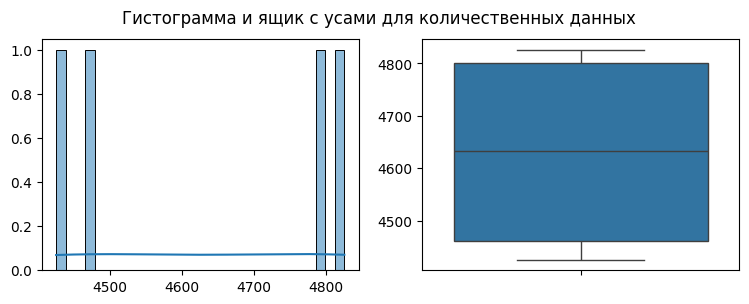

<Figure size 640x480 with 0 Axes>

In [34]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

df = pd.DataFrame(
    {
        'покупательская_активность': [
            'Снизилась',
            'Снизилась',
            'Снизилась',
            'Снизилась',
            'Прежний уровень',
            'Прежний уровень',
            'Прежний уровень',
            'Прежний уровень',
        ],
        'выручка_от_клиента_текущий_месяц': [
            4425,
            4472,
            4826,
            4793,
            4594,
            4506,
            4503,
            4749,
        ]
    }
)

df.columns = [x.lower().replace(" ", "_") for x in df.columns]

# Выбор категории для построения графиков
category = input()


def plot_histogram_boxplot(category):
    
    selected_data = df[df['покупательская_активность'] == category].reset_index(drop=True)
    
    fig, axs = plt.subplots(ncols=2, figsize=(9, 3))
    
    sns.histplot(x='выручка_от_клиента_текущий_месяц', 
                 data=selected_data,
                 ax=axs[0], 
                 bins=30, 
                 kde=True)
    sns.boxplot(y='выручка_от_клиента_текущий_месяц', 
                data=selected_data, 
                ax=axs[1])
    
    axs[0].set_xlabel('')
    axs[0].set_ylabel('')
    axs[1].set_xlabel('')
    axs[1].set_ylabel('')
    
    plt.suptitle('Гистограмма и ящик с усами для количественных данных')
    plt.show()
    plt.savefig('target_4_6.png')


# Построение графиков
plot_histogram_boxplot(category)

